In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected = True)
import chart_studio.plotly as py
cf.go_offline()
%matplotlib inline
import pandas_datareader.data as web
import datetime as dt

# MACHINE LEARNING
from sklearn.model_selection import train_test_split
# LOGISTIC REGRESSION MODEL IMPORTS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
#LINEAR REGRESSION MODEL IMPORTS
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#KNN MODEL IMPORTS
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#DECISION TREE IMPORTS
from sklearn.tree import DecisionTreeClassifier
#RANDOM FOREST IMPORTS
from sklearn.ensemble import RandomForestClassifier
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [3]:
# SPY DATA
spy0 = web.DataReader('SPY', 'yahoo', start='1993-01-28', end='2022-05-13')

In [4]:
spy0.drop("Adj Close", axis = 1, inplace = True)

In [5]:
spy0.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2022-05-09,406.410004,396.500000,405.100006,398.170013,155586100.0
2022-05-10,406.079987,394.820007,404.489990,399.089996,132497200.0
2022-05-11,404.040009,391.959991,398.070007,392.750000,142361000.0
2022-05-12,395.799988,385.149994,389.369995,392.339996,125090800.0
2022-05-13,403.179993,395.609985,396.709991,401.720001,104029300.0


In [6]:
# Current Day Close Return: Continuous (OUTPUT TO PREDICT)
output = pd.DataFrame((spy0["Close"]-spy0["Open"])/(spy0["Open"])).shift(-1)
output.columns = ["Return"]
output.tail()

,Return
Date,
2022-05-09,-0.013350
2022-05-10,-0.013365
2022-05-11,0.007628
2022-05-12,0.012629
2022-05-13,NaN


In [7]:
# Current Day Close Return: Categorical (OUTPUT TO PREDICT) (1 is positive or flat, 0 is negative)
outputc = pd.DataFrame(np.where(output.eval("Return >= 0"),1,0))
outputc.columns = ["Return C"]
outputc.index = output.index
outputc.tail()

,Return C
Date,
2022-05-09,0
2022-05-10,0
2022-05-11,1
2022-05-12,1
2022-05-13,0


In [8]:
# MODIFIED OUTCOME: Continuous (OUTPUT TO PREDICT)
moutput = pd.DataFrame(((spy0["High"]-spy0["Open"])-(spy0["Open"]-spy0["Low"]))/spy0["Open"]).shift(-1)
moutput.columns = ["MReturn"]
moutput.tail()

,MReturn
Date,
2022-05-09,-0.019976
2022-05-10,-0.000352
2022-05-11,0.005676
2022-05-12,0.013536
2022-05-13,NaN


In [9]:
# MODIFIED OUTCOME: Categorical (OUTPUT TO PREDICT) (1 is positive or flat, 0 is negative)
moutputc = pd.DataFrame(np.where(moutput.eval("MReturn >= 0"),1,0))
moutputc.columns = ["MReturnC"]
moutputc.index = moutput.index
moutputc.tail()

,MReturnC
Date,
2022-05-09,0
2022-05-10,0
2022-05-11,1
2022-05-12,1
2022-05-13,0


In [10]:
######################################

In [11]:
# Sentiment Data: 01/29/1993 - 05/12/2022
df0 = pd.read_excel("sentiment.xls",sheet_name = "SENTIMENT", skiprows = 294)
df00 = df0.drop(df0.index[1527:]).drop(df0.columns[4:],axis = 1)
df00.columns=["Date","Bull","Neutral","Bear"]
sdf = df00.set_index("Date")
sdf.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,0.158371,0.357466,0.484163
2022-04-21,0.188679,0.372642,0.438679
2022-04-28,0.164384,0.242009,0.593607
2022-05-05,0.268722,0.202643,0.528634
2022-05-12,0.243243,0.266409,0.490347


In [12]:
# Bull, neutral, bear Current Day Return
cdrs = pd.DataFrame(sdf.pct_change())
cdrs.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,-0.359149,0.054223,0.170061
2022-04-21,0.191373,0.042454,-0.093944
2022-04-28,-0.128764,-0.350559,0.353169
2022-05-05,0.634721,-0.162663,-0.109455
2022-05-12,-0.094815,0.314672,-0.072426


In [13]:
# Bull, neutral, bear Previous Day Return
pdrs = pd.DataFrame(sdf.pct_change()).shift(+1)
pdrs.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,-0.224924,-0.164410,0.502724
2022-04-21,-0.359149,0.054223,0.170061
2022-04-28,0.191373,0.042454,-0.093944
2022-05-05,-0.128764,-0.350559,0.353169
2022-05-12,0.634721,-0.162663,-0.109455


In [14]:
# 4 period moving average
fpma = sdf.rolling(window=4).mean()
fpma.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,0.263095,0.354951,0.381954
2022-04-21,0.228254,0.368746,0.402999
2022-04-28,0.189640,0.327799,0.482561
2022-05-05,0.195039,0.293690,0.511271
2022-05-12,0.216257,0.270926,0.512817


In [15]:
# 12 period moving average
tpma = sdf.rolling(window=12).mean()
tpma.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,0.248937,0.318809,0.432255
2022-04-21,0.245379,0.329927,0.424694
2022-04-28,0.237000,0.325219,0.437780
2022-05-05,0.239095,0.308630,0.452275
2022-05-12,0.243324,0.299532,0.457143


In [16]:
# MACD (Moving Average Convergence Divergence) between Bull, Neutral, Bear and the 4 MAs
fmacdsen = sdf-fpma
fmacdsen.head()

,Bull,Neutral,Bear
Date,,,
1993-01-29,NaN,NaN,NaN
1993-02-05,NaN,NaN,NaN
1993-02-12,NaN,NaN,NaN
1993-02-19,0.0175,-0.0525,0.0350
1993-02-26,-0.0875,0.0100,0.0775


In [17]:
# MACD (Moving Average Convergence Divergence) between Bull, Neutral, Bear and the 12 MAs
tmacdsen = sdf-tpma
tmacdsen.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,-0.090565,0.038657,0.051908
2022-04-21,-0.056700,0.042715,0.013985
2022-04-28,-0.072616,-0.083210,0.155827
2022-05-05,0.029627,-0.105987,0.076359
2022-05-12,-0.000081,-0.033123,0.033204


In [18]:
# MACD (Moving Average Convergence Divergence) between 4 MAs and the 12 MAs
ftmasen = fpma - tpma
ftmasen.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,0.014158,0.036142,-0.050301
2022-04-21,-0.017124,0.038819,-0.021694
2022-04-28,-0.047360,0.002580,0.044780
2022-05-05,-0.044056,-0.014940,0.058996
2022-05-12,-0.027067,-0.028607,0.055674


In [19]:
# SENTIMENT COMBO DF:
sentiment = pd.concat([sdf,cdrs,pdrs,fpma,tpma,fmacdsen,tmacdsen,ftmasen], axis = 1)
sentiment.columns = ["Bull","Neutral","Bear","Bull R","Neutral R","Bear R",
                     "Bull T-1R","Neutral T-1R","Bear T-1R","Bull 4","Neutral 4","Bear 4",
                     "Bull 12","Neutral 12","Bear 12","Bull-4","Neutral-4","Bear-4"
                    ,"Bull-12","Neutral-12","Bear-12","Bull 4-12","Neutral 4-12","Bear 4-12"]
sentiment.tail()

,Bull,Neutral,Bear,Bull R,Neutral R,Bear R,Bull T-1R,Neutral T-1R,Bear T-1R,Bull 4,...,Bear 12,Bull-4,Neutral-4,Bear-4,Bull-12,Neutral-12,Bear-12,Bull 4-12,Neutral 4-12,Bear 4-12
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-14,0.158371,0.357466,0.484163,-0.359149,0.054223,0.170061,-0.224924,-0.164410,0.502724,0.263095,...,0.432255,-0.104724,0.002515,0.102209,-0.090565,0.038657,0.051908,0.014158,0.036142,-0.050301
2022-04-21,0.188679,0.372642,0.438679,0.191373,0.042454,-0.093944,-0.359149,0.054223,0.170061,0.228254,...,0.424694,-0.039575,0.003896,0.035680,-0.056700,0.042715,0.013985,-0.017124,0.038819,-0.021694
2022-04-28,0.164384,0.242009,0.593607,-0.128764,-0.350559,0.353169,0.191373,0.042454,-0.093944,0.189640,...,0.437780,-0.025256,-0.085790,0.111046,-0.072616,-0.083210,0.155827,-0.047360,0.002580,0.044780
2022-05-05,0.268722,0.202643,0.528634,0.634721,-0.162663,-0.109455,-0.128764,-0.350559,0.353169,0.195039,...,0.452275,0.073683,-0.091047,0.017363,0.029627,-0.105987,0.076359,-0.044056,-0.014940,0.058996
2022-05-12,0.243243,0.266409,0.490347,-0.094815,0.314672,-0.072426,0.634721,-0.162663,-0.109455,0.216257,...,0.457143,0.026986,-0.004517,-0.022470,-0.000081,-0.033123,0.033204,-0.027067,-0.028607,0.055674


In [20]:
######################################

In [21]:
# COMBINING BOTH SPY AND SENTIMENT DFs

combo0 = pd.concat([sentiment, output,outputc,moutput,moutputc],axis = 1)
combo = combo0.dropna()
combo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1479 entries, 1993-04-16 to 2022-05-12
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Bull          1479 non-null   float64
 1   Neutral       1479 non-null   float64
 2   Bear          1479 non-null   float64
 3   Bull R        1479 non-null   float64
 4   Neutral R     1479 non-null   float64
 5   Bear R        1479 non-null   float64
 6   Bull T-1R     1479 non-null   float64
 7   Neutral T-1R  1479 non-null   float64
 8   Bear T-1R     1479 non-null   float64
 9   Bull 4        1479 non-null   float64
 10  Neutral 4     1479 non-null   float64
 11  Bear 4        1479 non-null   float64
 12  Bull 12       1479 non-null   float64
 13  Neutral 12    1479 non-null   float64
 14  Bear 12       1479 non-null   float64
 15  Bull-4        1479 non-null   float64
 16  Neutral-4     1479 non-null   float64
 17  Bear-4        1479 non-null   float64
 18  Bull-12   

In [22]:
######################################

<AxesSubplot:title={'center':'Distribution of next day modified returns'}, xlabel='MReturn', ylabel='Count'>

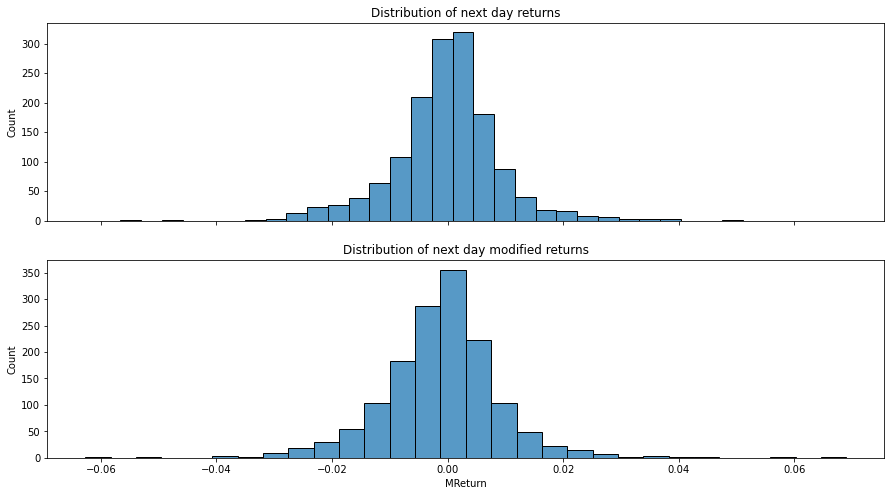

In [23]:
# PLOTS TO ANALYZE DATA
fig,axes = plt.subplots(ncols = 1, nrows =2, sharex = True, figsize = (15,8))
axes[0].set_title("Distribution of next day returns")
sns.histplot(ax = axes[0],x = combo["Return"], bins = 30)

axes[1].set_title("Distribution of next day modified returns")
sns.histplot(ax = axes[1],x = combo["MReturn"], bins = 30)

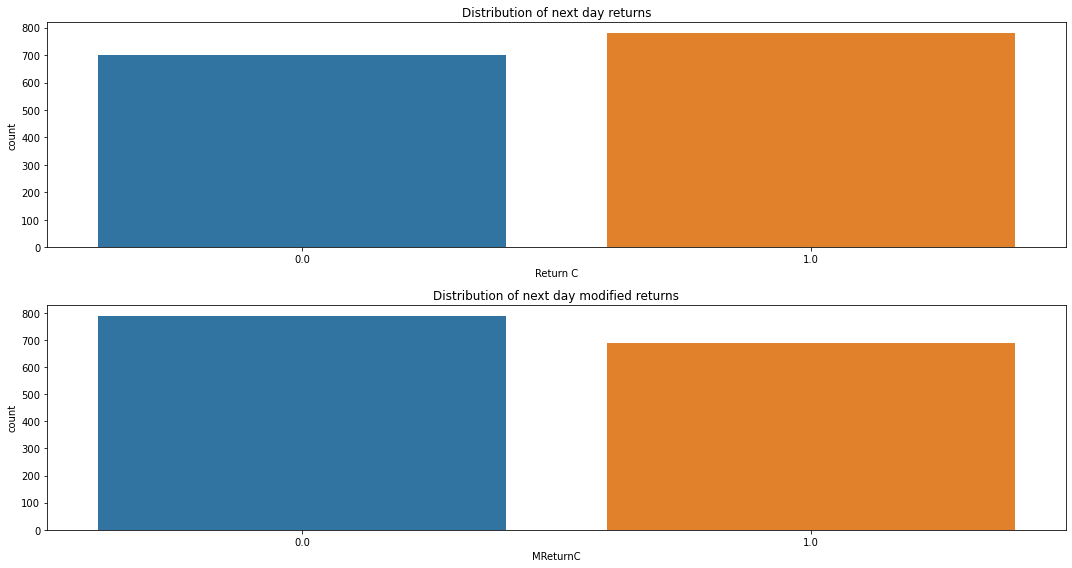

In [24]:
fig,axes = plt.subplots(ncols = 1, nrows =2, figsize = (15,8))
axes[0].set_title("Distribution of next day returns")
sns.countplot(ax = axes[0],x = combo["Return C"])

axes[1].set_title("Distribution of next day modified returns")
sns.countplot(ax = axes[1],x = combo["MReturnC"])
plt.tight_layout()

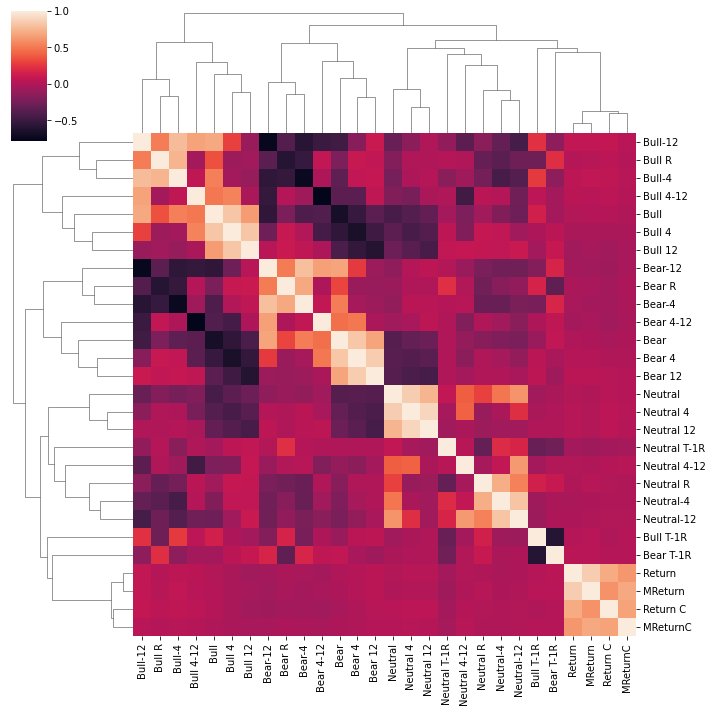

In [25]:
sns.clustermap(combo.corr())

<AxesSubplot:>

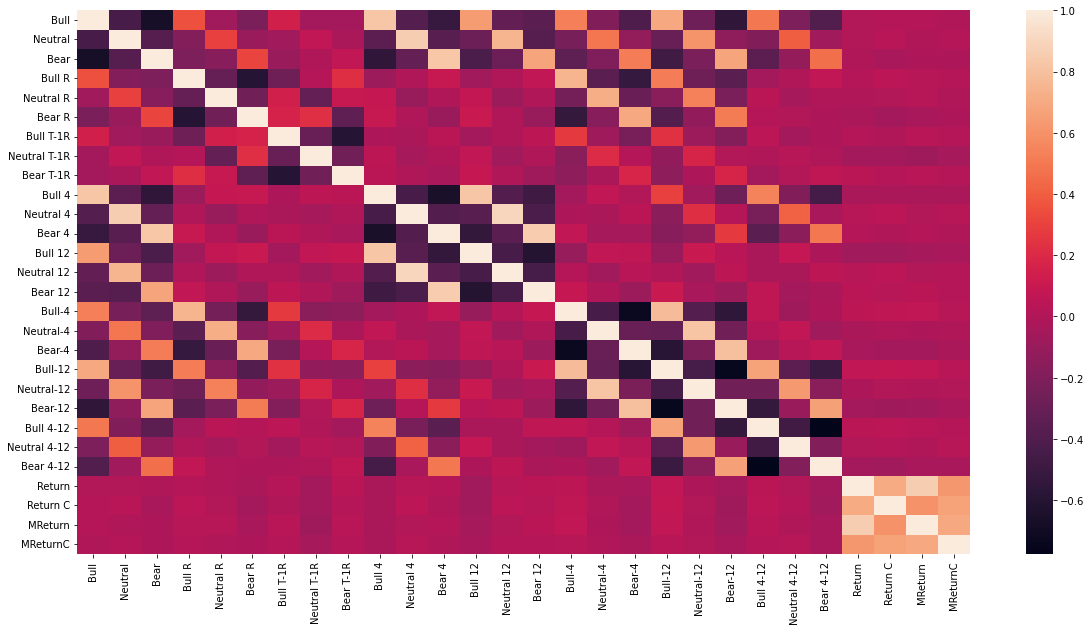

In [26]:
plt.figure(figsize = (20,10))
sns.heatmap(combo.corr())

In [27]:
######################################

In [28]:
## LOGISTIC REGRESSION MODEL1: LOGRM1
X = combo.drop(["Return","Return C","MReturn","MReturnC"],axis = 1)
y = combo["Return C"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.49      0.40      0.44       192
         1.0       0.60      0.68      0.64       252

    accuracy                           0.56       444
   macro avg       0.54      0.54      0.54       444
weighted avg       0.55      0.56      0.55       444

[[ 77 115]
 [ 81 171]]


In [29]:
## LOGISTIC REGRESSION MODEL2: LOGRM2
X = combo.drop(["Return","Return C","MReturn","MReturnC"],axis = 1)
y = combo["MReturnC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.54      0.92      0.68       236
         1.0       0.53      0.10      0.17       208

    accuracy                           0.54       444
   macro avg       0.53      0.51      0.42       444
weighted avg       0.53      0.54      0.44       444

[[217  19]
 [187  21]]


In [30]:
## LINEAR REGRESSION MODEL1: LRM1
X = combo.drop(["Return","Return C","MReturn","MReturnC"],axis = 1)
y = combo["Return"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
coef = pd.DataFrame(lr.coef_, X_train.columns, columns = ["Coef"])
# coef

<AxesSubplot:xlabel='Return'>

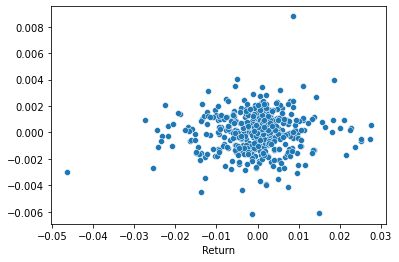

In [31]:
# SCATTER OF LRM1 AND ACTUAL
sns.scatterplot(y = predictions, x = y_test)

In [32]:
# LRM1 METRICS 
print("MAE:", metrics.mean_absolute_error(y_test,predictions))
print("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("RRMSE:",(np.sqrt(metrics.mean_squared_error(y_test,predictions)))/abs(y_test.mean()))

MAE: 0.0061924986961689734
MSE: 7.528238208239312e-05
RMSE: 0.008676542057893404
RRMSE: 22.52332899722606


In [33]:
## LINEAR REGRESSION MODEL2: LRM2
X = combo.drop(["Return","Return C","MReturn","MReturnC"],axis = 1)
y = combo["MReturn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
coef = pd.DataFrame(lr.coef_, X_train.columns, columns = ["Coef"])
# coef

<AxesSubplot:xlabel='MReturn'>

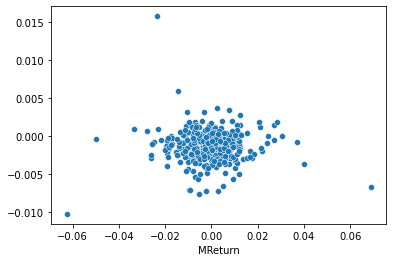

In [34]:
# SCATTER OF LRM2 AND ACTUAL
sns.scatterplot(y = predictions, x = y_test)

In [35]:
# LRM2 METRICS 
print("MAE:", metrics.mean_absolute_error(y_test,predictions))
print("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("RRMSE:",(np.sqrt(metrics.mean_squared_error(y_test,predictions)))/abs(y_test.mean()))

MAE: 0.007352597582487872
MSE: 0.00011690011488079137
RMSE: 0.010812035649256405
RRMSE: 15.63946952419897


In [36]:
# KNN MODEL 1: KNN1
scaler = StandardScaler()
scaler.fit(combo.drop(["Return","Return C","MReturn","MReturnC"],axis = 1))
scaled_features = scaler.transform(combo.drop(["Return","Return C","MReturn","MReturnC"],axis = 1))
combo_feat = pd.DataFrame(scaled_features, columns = combo.drop(["Return","Return C","MReturn","MReturnC"],axis = 1).columns)
X = combo_feat
y = combo["Return C"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
p1 = knn.predict(X_test)
print(classification_report(y_test,p1))
print(confusion_matrix(y_test,p1))

              precision    recall  f1-score   support

         0.0       0.48      0.51      0.49       201
         1.0       0.57      0.53      0.55       243

    accuracy                           0.52       444
   macro avg       0.52      0.52      0.52       444
weighted avg       0.53      0.52      0.53       444

[[103  98]
 [113 130]]


Text(0, 0.5, 'Error Rate')

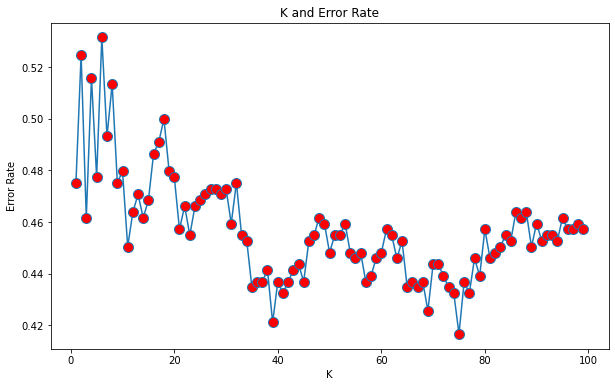

In [37]:
# KNN1 ELBOW METHOD ADJUSTMENT OF K
error_rate = []
for i in range (1,100):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    p1 = knn.predict(X_test)
    error_rate.append(np.mean(p1 != y_test))
plt.figure(figsize = (10,6))
plt.plot(range(1,100),error_rate, marker = "o", markerfacecolor= "red", markersize = 10)
plt.title("K and Error Rate")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [38]:
# KNN1 Adjusted with K = 39
knn = KNeighborsClassifier(n_neighbors = 39)
knn.fit(X_train,y_train)
p1 = knn.predict(X_test)
print(classification_report(y_test,p1))
print(confusion_matrix(y_test,p1))

              precision    recall  f1-score   support

         0.0       0.54      0.43      0.48       201
         1.0       0.60      0.70      0.65       243

    accuracy                           0.58       444
   macro avg       0.57      0.57      0.56       444
weighted avg       0.57      0.58      0.57       444

[[ 86 115]
 [ 72 171]]


In [39]:
# KNN MODEL 2: KNN2
scaler = StandardScaler()
scaler.fit(combo.drop(["Return","Return C","MReturn","MReturnC"],axis = 1))
scaled_features = scaler.transform(combo.drop(["Return","Return C","MReturn","MReturnC"],axis = 1))
combo_feat = pd.DataFrame(scaled_features, columns = combo.drop(["Return","Return C","MReturn","MReturnC"],axis = 1).columns)
X = combo_feat
y = combo["MReturnC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
p1 = knn.predict(X_test)
print(classification_report(y_test,p1))
print(confusion_matrix(y_test,p1))

              precision    recall  f1-score   support

         0.0       0.54      0.51      0.53       245
         1.0       0.43      0.46      0.44       199

    accuracy                           0.49       444
   macro avg       0.49      0.49      0.49       444
weighted avg       0.49      0.49      0.49       444

[[126 119]
 [108  91]]


Text(0, 0.5, 'Error Rate')

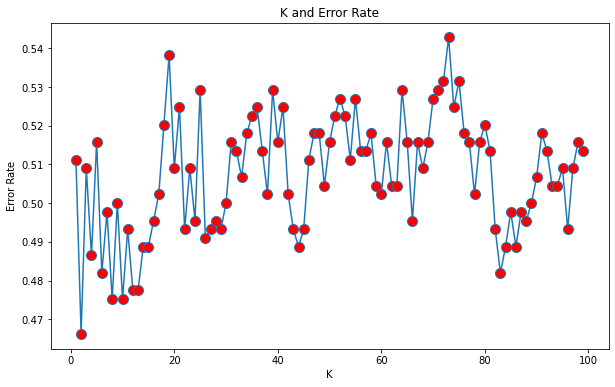

In [40]:
# KNN2 ELBOW METHOD ADJUSTMENT OF K
error_rate = []
for i in range (1,100):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    p1 = knn.predict(X_test)
    error_rate.append(np.mean(p1 != y_test))
plt.figure(figsize = (10,6))
plt.plot(range(1,100),error_rate, marker = "o", markerfacecolor= "red", markersize = 10)
plt.title("K and Error Rate")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [41]:
# KNN2 Adjusted with K = 8
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train,y_train)
p1 = knn.predict(X_test)
print(classification_report(y_test,p1))
print(confusion_matrix(y_test,p1))

              precision    recall  f1-score   support

         0.0       0.56      0.65      0.60       245
         1.0       0.46      0.37      0.41       199

    accuracy                           0.52       444
   macro avg       0.51      0.51      0.51       444
weighted avg       0.52      0.52      0.52       444

[[160  85]
 [126  73]]


In [42]:
# DECISION TREE 1: DT1
X = combo.drop(["Return","Return C","MReturn","MReturnC"],axis = 1)
y = combo["Return C"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
p1 = dtree.predict(X_test)
print(confusion_matrix(y_test,p1))
print(classification_report(y_test,p1))

[[113 106]
 [110 115]]
              precision    recall  f1-score   support

         0.0       0.51      0.52      0.51       219
         1.0       0.52      0.51      0.52       225

    accuracy                           0.51       444
   macro avg       0.51      0.51      0.51       444
weighted avg       0.51      0.51      0.51       444



In [43]:
# RANDOM FOREST 1: RF1
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train,y_train)
p2 = rf.predict(X_test)
print(confusion_matrix(y_test,p2))
print(classification_report(y_test,p2))

[[ 98 121]
 [ 89 136]]
              precision    recall  f1-score   support

         0.0       0.52      0.45      0.48       219
         1.0       0.53      0.60      0.56       225

    accuracy                           0.53       444
   macro avg       0.53      0.53      0.52       444
weighted avg       0.53      0.53      0.52       444



In [44]:
# DECISION TREE 2: DT2
X = combo.drop(["Return","Return C","MReturn","MReturnC"],axis = 1)
y = combo["MReturnC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
p1 = dtree.predict(X_test)
print(confusion_matrix(y_test,p1))
print(classification_report(y_test,p1))

[[127 109]
 [114  94]]
              precision    recall  f1-score   support

         0.0       0.53      0.54      0.53       236
         1.0       0.46      0.45      0.46       208

    accuracy                           0.50       444
   macro avg       0.50      0.50      0.49       444
weighted avg       0.50      0.50      0.50       444



In [45]:
# RANDOM FOREST 2: RF2
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train,y_train)
p2 = rf.predict(X_test)
print(confusion_matrix(y_test,p2))
print(classification_report(y_test,p2))

[[150  86]
 [121  87]]
              precision    recall  f1-score   support

         0.0       0.55      0.64      0.59       236
         1.0       0.50      0.42      0.46       208

    accuracy                           0.53       444
   macro avg       0.53      0.53      0.52       444
weighted avg       0.53      0.53      0.53       444



In [46]:
# Support Vector Machine 1: SVM1
X = combo.drop(["Return","Return C","MReturn","MReturnC"],axis = 1)
y = combo["Return C"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = SVC()
model.fit(X_train,y_train)
p1 = model.predict(X_test)
print(classification_report(y_test, p1))
print(confusion_matrix(y_test,p1))

              precision    recall  f1-score   support

         0.0       0.58      0.28      0.38       215
         1.0       0.55      0.81      0.65       229

    accuracy                           0.55       444
   macro avg       0.56      0.55      0.51       444
weighted avg       0.56      0.55      0.52       444

[[ 60 155]
 [ 43 186]]


In [47]:
# Grid Search
param_grid = {"C":[.1,1,10,100,1000],"gamma":[1,.1,.01,.001,.0001]}
grid = GridSearchCV(SVC(), param_grid,verbose = 3)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))
print(confusion_matrix(y_test,grid_predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.531 total time=   0.1s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.531 total time=   0.1s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.531 total time=   0.1s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.531 total time=   0.1s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.536 total time=   0.1s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.531 total time=   0.1s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.531 total time=   0.1s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.531 total time=   0.1s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.531 total time=   0.1s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.536 total time=   0.1s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.531 total time=   0.1s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END ...................C=1000, gamma=1;, score=0.570 total time=   0.5s
[CV 3/5] END ...................C=1000, gamma=1;, score=0.536 total time=   0.5s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.527 total time=   0.5s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.556 total time=   0.5s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.531 total time=   0.1s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.536 total time=   0.1s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.570 total time=   0.1s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.551 total time=   0.1s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.527 total time=   0.1s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.575 total time=   0.1s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.531 total time=   0.1s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.551 total time=   0.1s
[CV 4/5] END ...............